In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

teams_dict, teams_list = get_teams(league="NBA")
box_DIR = "../data/box/"
img_DIR_T = "../data/images/teams/"

In [2]:
season = 2024
stats = leaguegamelog.LeagueGameLog(
    player_or_team_abbreviation="T",
    season=season,
    season_type_all_star="Regular Season",
)
df1 = stats.get_data_frames()[0]

df1["HOME"] = ~df1["MATCHUP"].str.contains("@")

In [46]:
df1.columns = map(str.lower, df1.columns)
df1["game_date"] = pd.to_datetime(df1["game_date"])
df2 = df1[df1["home"]]
df2 = df2[['game_date', 'matchup', 'wl', 'pts', 'plus_minus', 'home']]
df2[["team1","team2"]] = df2["matchup"].str.replace(" vs. ",",").str.split(",",expand=True)

In [47]:
from elosports.elo import Elo

In [67]:
eloLeague = Elo(k=60,homefield=100)
teams = df2.team1.unique()
for team in teams:
	eloLeague.addPlayer(team)
rat1, rat2 = [], []
for game in df2.iterrows():
    if game[1].plus_minus>0:
        eloLeague.gameOver(game[1].team1, game[1].team2,True)
    else:
        eloLeague.gameOver(game[1].team2, game[1].team1,False)
    rat1.append(eloLeague.ratingDict[game[1].team1])
    rat2.append(eloLeague.ratingDict[game[1].team2])
df2["rat1"] = rat1
df2["rat2"] = rat2
df2

,game_date,matchup,wl,pts,plus_minus,home,team1,team2,rat1,rat2
1,2024-10-22,BOS vs. NYK,W,132,23,True,BOS,NYK,1521.596100,1478.403900
2,2024-10-22,LAL vs. MIN,W,110,7,True,LAL,MIN,1521.596100,1478.403900
7,2024-10-23,PHI vs. MIL,L,109,-15,True,PHI,MIL,1461.596100,1538.403900
9,2024-10-23,DET vs. IND,L,109,-6,True,DET,IND,1461.596100,1538.403900
11,2024-10-23,ATL vs. BKN,W,120,4,True,ATL,BKN,1521.596100,1478.403900
...,...,...,...,...,...,...,...,...,...,...
829,2024-12-21,BKN vs. UTA,L,94,-11,True,BKN,UTA,1407.768852,1392.557704
832,2024-12-21,SAC vs. LAL,L,99,-4,True,SAC,LAL,1401.136843,1569.070383
834,2024-12-22,SAC vs. IND,L,95,-27,True,SAC,IND,1369.127427,1509.839945
837,2024-12-22,TOR vs. HOU,L,110,-4,True,TOR,HOU,1287.035540,1644.643932


In [68]:
df31 = df2[["game_date","team1","rat1"]]
df32 = df2[["game_date","team2","rat2"]]
df31.columns = ["game_date","team","rating"]
df32.columns = ["game_date","team","rating"]
df3 = pd.concat([df31,df32]).sort_values("game_date")

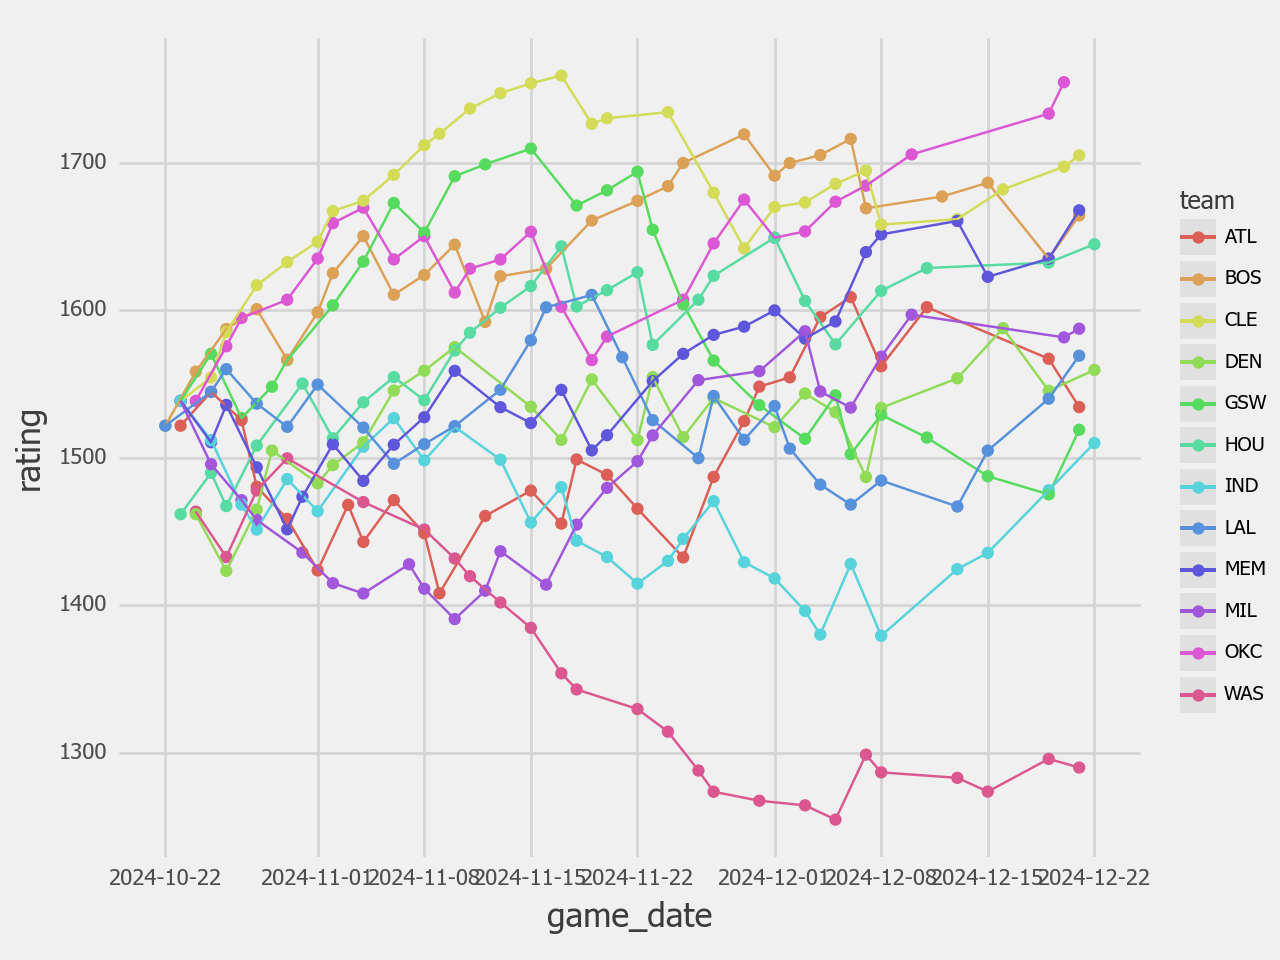

<Figure Size: (640 x 480)>

In [ ]:
ts = ["BOS","CLE","OKC","HOU","MIL","DEN","MEM","LAL","GSW","IND","ATL","WAS"]
data = df3[df3["team"].isin(ts)]
p = (
    ggplot(data)
    + aes(x="game_date",y="rating",group="team",color="team")
    + geom_point()
    + geom_line()
)
p